# Convolutional Neural Network#


## Contexte Traitement d'images en DeepLearning##

## Méthode CNN ##

1/ on va comparer les images fragement par fragment => ce qu'on appelle les caractéristiques 

2/ On va détecter les similitudes des caractéristiques entre 2 images différentes

3/ Dans une nouvelle image, le CNN na sait pas exactement sir les caractéristqiues des pixels seront présentes dans l'image => on va effectuer un filtrage. Les mathématiques que nous utilisons derrière le filtrage sont appelés convolution. Il suuffit de mutliplier chaque pixel de la caractéristqieu par la valeur que le même pixel conitent de l'image. 

4/ Construction d'une map = nouveau tableau de 2D

5/ On répéte le processus complet de convolution pour l'ensemble des caractéristiques existants. 


## Pooling ##

Prendre 1 image et réduire la taille en préservant toutes les infos les plus importantes (garde la val max)

## RelU ##

Remplacer les valeurs négatives par un 0 => empêche les valeurs apprises de rester coincer autour de 0 ou d'explorer vers l'infinie

## Architecture des CNN ##

Dessinez une architecture type d’un CNN à minimum 2 couches pour une image en entrée d’une taille de 32x32. Sur chaque couche notez les dimensions des tableaux et leur nom.

Matrice de convolution

Conv2D (TabConv1 32x32) -> Conv2D (TabConv2 32x32) -> MaxPooling (TabPool1 16x16) -> Flatten (Vecteur ) -> Dense (16) -> Dense (avec nb de cluster à la fin )


## MNIST Data = jeu de données fashion 

![alt text](image.png)

In [52]:
from tensorflow.keras.datasets import mnist

# Télécharger et sauvegarder le dataset MNIST
## 60K for training and 10K for testing
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [53]:
## redécouper le dataset pour avoir des validations data
# splitting into train and validation data 10% of the training data sate 

from sklearn.model_selection import train_test_split
x_train,x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42,test_size=0.10)

### Training 54K images, 6K images for validation and 10K images for testing

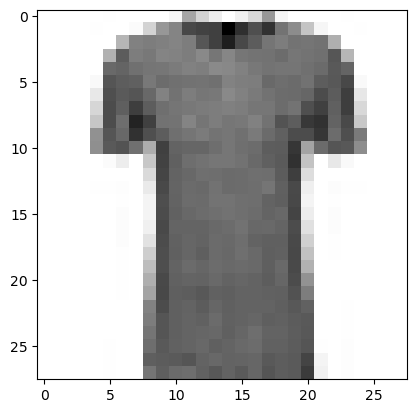

In [57]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1664],cmap="Greys")
plt.show()

In [41]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

### Important points ###

For every neural network project you will do in the future, these rules always apply.

1/ Start simple. Use a single layer perceptron and evaluate the result. If it is good, then proceed to deployment.

2/ If the previous step is not good enough, try to get your network wider and/or deeper. Add several neurons in your single-layer perceptron. Or, add one layer into the existing network. Evaluate and, if it is good, proceed to deployment. If not, then iterate by adding more neurons or layers.

3/ When, after adding several more layers into your network, but the results are still not good, then maybe you need to change your network architecture. Use Convolutional Neural Network (CNN) for images or Recurring Neural Network for time-series and texts.

### 1/ Single-layer perceptron ###

![alt text](image-2.png)

The usual neural network images you see everywhere is the perceptron diagram. There are three layers on the image above: the Input Layer; one Hidden Layer; and the Output Layer. The Input and Output Layers will always be one layer each, for every network.
Therefore, I count only the number of Hidden Layers to recognize how deep it is. For that image, because there is only one Hidden Layer, I call that Single Layer Perceptron.

Our image is 28x28, and therefore is two-dimensional. Because of our perceptron only able to read one-dimensional data, let's flatten them.


In [58]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape, y_val.shape)

# Your training data x_train is transformed from 60,000 x 28 x 28 to 60,000 x 784. 
# Your testing data x_test follows suit, from 10,000 x 28 x 28 to 10,000 x 784.

(54000, 10) (10000, 10) (6000,)


The Sequential model is the easiest model Keras has. 
The first line of model.add method is adding your hidden layer with 10 cells, coming from 784 input cells.

The second add method is adding your output layer to the network. This has 10 cells as I elaborated before.

The Relu and Softmax activation options are non-linear. Being able to use non-linear data makes Neural Network particularly useful. Generally, neural networks can map any data distribution at any level of complexity.

In [59]:
model= Sequential()
model.add(Dense(10, input_dim=784,activation='relu')) # First hidden layer
model.add(Dense(10,activation='softmax')) # output with 10 categories
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


You don't have to know what Relu and Softmax are. These are too complex for a beginner. You just need to follow these tips:

1/ Use Relu whenever possible, on every hidden layer.

2/ Use Softmax on output layers with more than two categories to be predicted.

3/ Use Sigmoid on an output layer with two categories.

After creating your model, call compile method to finish your model. It usually takes three parameters. Always use categorical_crossentropy for multi-categories, and binary_crossentropy for two categories. Use adam or rmsprop as the optimizer since both of them are pretty good. And you need accuracy as the metric to check your network performance.

In [60]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)
# we will use 10% of the training data as the validation data, hence validation_split was set to 0.1.
# epochs is the number of training loops we will do. 
# One epoch will expose all of our training data once to the network. More epochs means the network will know better about our data.

Epoch 1/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7686 - loss: 0.6790 - val_accuracy: 0.8231 - val_loss: 0.5206
Epoch 2/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8345 - loss: 0.4788 - val_accuracy: 0.8272 - val_loss: 0.4838
Epoch 3/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8470 - loss: 0.4425 - val_accuracy: 0.8433 - val_loss: 0.4510
Epoch 4/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8515 - loss: 0.4253 - val_accuracy: 0.8494 - val_loss: 0.4371
Epoch 5/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8574 - loss: 0.4119 - val_accuracy: 0.8470 - val_loss: 0.4402
Epoch 6/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8592 - loss: 0.4044 - val_accuracy: 0.8574 - val_loss: 0.4131
Epoch 7/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8612 - loss: 0.3967 - val_accuracy: 0.8520 - val_loss: 0.4260
Epoch 8/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8635 - loss: 0.3899 - 

In [63]:
# Évaluation rapide
_, test_acc = model.evaluate(x_test, y_test)
print(f'{test_acc*100:.3f} %,pretty good on the data') 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8495 - loss: 0.4297
84.950 %,pretty good on the data


#### Accuracy ### 
This is a metric to measure how good the performance of your network is. 84% accuracy on test data means the network guessed right for around 8400 images from the 10K test data.

A higher accuracy on test data means a better network. If you think the accuracy should be higher, maybe you need the next step(s) in building your Neural Network.

## 2/ Make the network wider ##

In [64]:
model2 = Sequential()
model2.add(Dense(50, input_dim=784, activation='relu')) # First hidden layer => on augmente le nombre de neurone
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8122 - loss: 0.5469 - val_accuracy: 0.8407 - val_loss: 0.4544
Epoch 2/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8548 - loss: 0.4106 - val_accuracy: 0.8574 - val_loss: 0.4071
Epoch 3/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8672 - loss: 0.3726 - val_accuracy: 0.8569 - val_loss: 0.3854
Epoch 4/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8749 - loss: 0.3491 - val_accuracy: 0.8661 - val_loss: 0.3701
Epoch 5/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8800 - loss: 0.3315 - val_accuracy: 0.8693 - val_loss: 0.3631
Epoch 6/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8859 - loss: 0.3154 - val_accuracy: 0.8711 - val_loss: 0.3472
Epoch 7/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8889 - loss: 0.3047 - val_accuracy: 0.8704 - val_loss: 0.3474
Epoch 8/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8934 - loss: 0.2936 - 

In [65]:
_, test_acc = model2.evaluate(x_test, y_test)
print(f'{test_acc*100:.3f} %,pretty good on the data')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8762 - loss: 0.3546
87.620 %,pretty good on the data


In [66]:
## Create a deeper network

model3 = Sequential()
model3.add(Dense(50, input_dim=784, activation='relu'))
model3.add(Dense(50, activation='relu'))  ## on ajoute une couche dense
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8102 - loss: 0.5480 - val_accuracy: 0.8524 - val_loss: 0.4180
Epoch 2/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8587 - loss: 0.3952 - val_accuracy: 0.8502 - val_loss: 0.4031
Epoch 3/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8705 - loss: 0.3576 - val_accuracy: 0.8557 - val_loss: 0.3914
Epoch 4/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8779 - loss: 0.3354 - val_accuracy: 0.8602 - val_loss: 0.3698
Epoch 5/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8856 - loss: 0.3137 - val_accuracy: 0.8704 - val_loss: 0.3538
Epoch 6/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8894 - loss: 0.3007 - val_accuracy: 0.8694 - val_loss: 0.3502
Epoch 7/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8926 - loss: 0.2893 - val_accuracy: 0.8728 - val_loss: 0.3566
Epoch 8/10
1519/1519 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8954 - loss: 0.2807 - 

In [68]:
_, test_acc = model3.evaluate(x_test, y_test)
print(f'{test_acc*100:.3f} %; the improvement is not that big')

# Maybe our approach is not right by using perceptron on images. How about we change it into…

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8763 - loss: 0.3468
87.630 %; the improvement is not that big


## 3/ Convolutional neural network ## 

A convolutional neural network (CNN) is a neural network that can "see " a subset of our data. It can detect a pattern in images better than perceptron. Read more about Convolutional Neural Network Tutorial on my blog post.

![alt text](image-3.png)

In [81]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [82]:
x_train.shape
## If you check your x_train, you will have 60,000 x 28 x 28 x 1 data.
# Why x 1?
# The data CNN needs to read must be like this: total_data x width x height x channels.
# Height and width are self-explanatory. Channels are like Red or Green or Blue in RGB images. 
# In RGB, because there are three channels, we need to make the data x 3. 
# But because we work with grayscale images, every value on Red, Green, or Blue channel is the same and we reduce to one channel.

(60000, 28, 28, 1)

In [83]:
model4 = Sequential()
model4.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model4.add(MaxPooling2D(pool_size=2))
model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## The code is a little bit different. There are Conv2D, MaxPooling2D, and Flatten.
# These guys are the three most common layers to use in CNN.

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model4.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,770 (491.29 KB)

 Trainable params: 125,770 (491.29 KB)

 Non-trainable params: 0 (0.00 B)

conv2d changes your 28x28x1 image to 28x28x64. Just imagine this as 64 hidden layer cells.

MaxPooling2D reduces the width and height so that you will not need to compute all the cells. It reduces the size to 14x14x64.

Finally, flatten just flattens out the output of MaxPooling into a hidden layer of 12544 cells.

In [85]:
model4.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8496 - loss: 0.4301 - val_accuracy: 0.8835 - val_loss: 0.3307
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8920 - loss: 0.3088 - val_accuracy: 0.8887 - val_loss: 0.3054
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9016 - loss: 0.2776 - val_accuracy: 0.8993 - val_loss: 0.2879
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9084 - loss: 0.2573 - val_accuracy: 0.9015 - val_loss: 0.2846
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9141 - loss: 0.2405 - val_accuracy: 0.8940 - val_loss: 0.2839
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9189 - loss: 0.2267 - val_accuracy: 0.9008 - val_loss: 0.2732
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9230 - loss: 0.2152 - val_accuracy: 0.8977 - val_loss: 0.2949
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9271 - loss: 0.2

In [86]:
_, test_acc = model4.evaluate(x_test, y_test)
print(f'{test_acc*100:.3f} % accuracy. Changing the architecture into a more suitable one really works')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8980 - loss: 0.2900
89.800 % accuracy. Changing the architecture into a more suitable one really works


## 4/ Exercice supllémentaire ##

Et si on rendait notre réseau de neurones un peu plus “deep” en rajoutant 1 couche convolutive (Conv2D) suivie d’une couche de pooling (MaxPooling2D), la précision du modèle est-elle la même ? Qu’en est-il si on rajoute une couche entièrement connectée ? Même question si on rajoute du Dropout (R2.4). Même question si on essaye d’augmenter de façon artificielle notre dataset (R2.5 et R2.6).


### 4.1/ Couches de neurones plus "deep"

In [87]:
model5 = Sequential()
model5.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28, 1))) 
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(activation='relu',filters=64, kernel_size=2, padding='same'))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(10, activation='softmax'))
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,138 (188.04 KB)

 Trainable params: 48,138 (188.04 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
model5.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8420 - loss: 0.4449 - val_accuracy: 0.8722 - val_loss: 0.3489
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8874 - loss: 0.3171 - val_accuracy: 0.8947 - val_loss: 0.2878
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9008 - loss: 0.2782 - val_accuracy: 0.8993 - val_loss: 0.2804
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9089 - loss: 0.2526 - val_accuracy: 0.9005 - val_loss: 0.2700
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9169 - loss: 0.2309 - val_accuracy: 0.9042 - val_loss: 0.2669
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9215 - loss: 0.2142 - val_accuracy: 0.9027 - val_loss: 0.2623
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9266 - loss: 0.2002 - val_accuracy: 0.9100 - val_loss: 0.2461
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9299 - loss:

In [89]:
_, test_acc = model5.evaluate(x_test, y_test)
print(f'{test_acc*100:.3f} % accuracy. We improve greatly the accuracy of the model')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9131 - loss: 0.2542
91.310 % accuracy. We improve greatly the accuracy of the model


### 4.2/ ajout d'une couche connectée


l'ajout d'une couche complètement connectée (ou couche dense) à un modèle séquentiel s'effectue via la méthode add du modèle Sequential. 
Cette couche est définie en spécifiant le nombre de neurones (par exemple, 100) et, pour la première couche, la dimension d'entrée (par exemple, 784 pour les images MNIST redimensionnées en vecteurs). L'ajout se fait de la manière suivante : `model.add(Dense(100, input_dim=784, name='fc1'))`. Cette couche effectue une projection linéaire des données d'entrée vers un espace de dimension plus réduite, souvent suivie d'une fonction d'activation non linéaire comme la sigmoïde ou la ReLU pour permettre l'apprentissage de relations complexes. Pour une tâche de classification à plusieurs classes, la dernière couche est généralement une couche dense suivie d'une activation softmax pour produire des probabilités pour chaque classe

Le nombre 128 est un choix courant par défaut, mais il n'est pas magique. Il représente le nombre de neurones (ou unités) dans cette couche dense intermédiaire.

Ce nombre est un hyperparamètre que vous devez ajuster. Il n'y a pas de règle stricte, mais voici les principes :

Trop petit : Le modèle manque de capacité pour apprendre des représentations complexes, ce qui entraîne un sous-apprentissage.

Trop grand : Le modèle devient très complexe, ce qui augmente le risque de surapprentissage (le modèle apprend par cœur les données d'entraînement) et nécessite plus de données et de puissance de calcul.
Les valeurs comme 64, 128, 256, 512 sont fréquentes car elles sont des puissances de 2, ce qui est efficace pour le calcul sur GPU. Le choix dépend de la complexité de votre problème et de la taille de votre jeu de données.


In [ ]:
from keras import Input
model6 = Sequential()
model6.add(Input(shape=(28,28,1)))
model6.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model6.add(MaxPooling2D(pool_size=2))
model6.add(Conv2D(activation='relu',filters=64, kernel_size=2, padding='same'))
model6.add(MaxPooling2D(pool_size=2))
model6.add(Flatten())
model6.add(Dense(49,activation='relu'))  # Nouvelle couche => pourquoi 49 car 7 * 7 (maxpooling dimension)
model6.add(Dense(10, activation='softmax'))
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 49)             │       153,713 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,981 (667.89 KB)

 Trainable params: 170,981 (667.89 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
model6.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8360 - loss: 0.4559 - val_accuracy: 0.8598 - val_loss: 0.3725
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8890 - loss: 0.3054 - val_accuracy: 0.8930 - val_loss: 0.2878
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.9038 - loss: 0.2632 - val_accuracy: 0.9075 - val_loss: 0.2591
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9143 - loss: 0.2348 - val_accuracy: 0.9043 - val_loss: 0.2609
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.9238 - loss: 0.2102 - val_accuracy: 0.9142 - val_loss: 0.2371
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9304 - loss: 0.1895 - val_accuracy: 0.9167 - val_loss: 0.2359
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9360 - loss: 0.1725 - val_accuracy: 0.9117 - val_loss: 0.2520
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9417 - los

In [ ]:
_, test_acc = model6.evaluate(x_test, y_test)
print(f'{test_acc*100:.3f} % accuracy')
### le modèle n'est pas trop amélioré par rapport à avant

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9054 - loss: 0.2843
90.540 % accuracy


### 4.3/ ajout d'un dropout

Les valeurs typiques sont plutôt comprises entre 0.2 et 0.5 :

0.2 à 0.3 : Valeurs plus douces, souvent utilisées après les couches convolutives.
0.4 à 0.5 : Valeurs plus fortes, courantes après les grandes couches denses.
Commencer par une valeur plus faible comme 0.3 ou 0.4. Ajuster en fonction des performances du modèle (surapprentissage).


In [100]:
from tensorflow.keras.layers import Dropout

model7 = Sequential()
model7.add(Input(shape=(28,28,1)))
model7.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model7.add(MaxPooling2D(pool_size=2))
model7.add(Conv2D(activation='relu',filters=64, kernel_size=2, padding='same'))
model7.add(MaxPooling2D(pool_size=2))
model7.add(Flatten())
model7.add(Dense(49,activation='relu'))  # Nouvelle couche => pourquoi 49 car 7 * 7 (maxpooling dimension)
model7.add(Dropout(0.4)) # Désactive aléatoirement 50% des neurones
model7.add(Dense(10, activation='softmax'))
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 49)             │       153,713 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,981 (667.89 KB)

 Trainable params: 170,981 (667.89 KB)

 Non-trainable params: 0 (0.00 B)

In [101]:
model7.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.7770 - loss: 0.6273 - val_accuracy: 0.8688 - val_loss: 0.3685
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8454 - loss: 0.4311 - val_accuracy: 0.8803 - val_loss: 0.3269
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8634 - loss: 0.3834 - val_accuracy: 0.8953 - val_loss: 0.2948
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8728 - loss: 0.3515 - val_accuracy: 0.8970 - val_loss: 0.2807
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8829 - loss: 0.3256 - val_accuracy: 0.9023 - val_loss: 0.2636
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8859 - loss: 0.3087 - val_accuracy: 0.9058 - val_loss: 0.2575
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8935 - loss: 0.2919 - val_accuracy: 0.9100 - val_loss: 0.2481
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8971 - loss

In [ ]:
_, test_acc = model7.evaluate(x_test, y_test)
print(f'{test_acc*100:.3f} % accuracy')
## au niveau de l'accuracy on ne gagne pas grand chose 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9055 - loss: 0.2603
90.550 % accuracy


### 4.4/ augmentation artificiel du dataset

 L'augmentation des données consiste à générer des données d'entraînement supplémentaires à partir de vos exemples existants en les augmentant à l'aide de transformations aléatoires qui produisent des images d'apparence crédible. Cela permet d'exposer le modèle à davantage d'aspects des données et de mieux généraliser.

Vous implémenterez l'augmentation des données à l'aide des couches de prétraitement Keras suivantes : tf.keras.layers.RandomFlip , tf.keras.layers.RandomRotation et tf.keras.layers.RandomZoom . Celles-ci peuvent être incluses dans votre modèle comme d'autres couches et exécutées sur le GPU.

In [115]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

img_height=28
img_width =28

data_augmentation = Sequential(
  [
    RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,1)),
    RandomRotation(0.1),
    RandomZoom(0.1),
  ]
)

c:\Users\mvana\anaconda3\envs\ML_env\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [119]:
import tensorflow as tf

# Prendre une image, ajouter la dimension batch : (1, 28, 28, 1)
idx = 0
x1 = x_train[idx:idx+1, ...]  # déjà (1, 28, 28, 1)

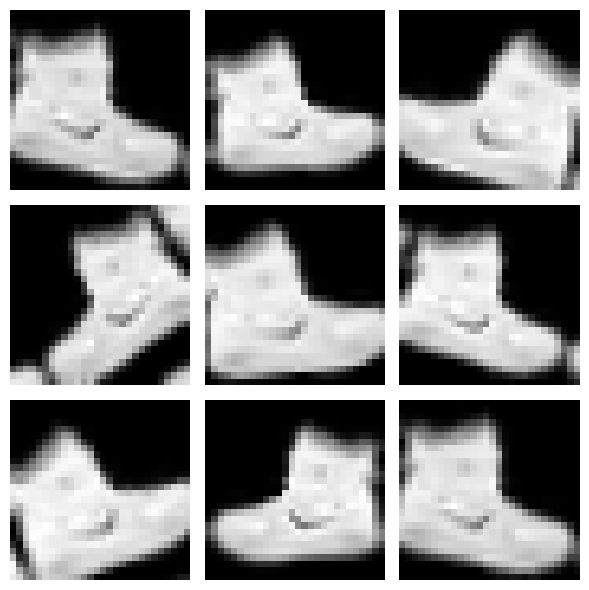

In [120]:
plt.figure(figsize=(6, 6))
for i in range(9):
    # IMPORTANT: training=True pour forcer l'augmentation en mode inference
    aug = data_augmentation(x1, training=True)  # (1,28,28,1)
    img = aug[0, ..., 0].numpy()                # (28,28)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [124]:
model8 = Sequential()
model8.add(Input(shape=(28,28,1)))
model8.add(data_augmentation) ### on ajoute les données en première couche

model8.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')) 
model8.add(MaxPooling2D(pool_size=2))
model8.add(Conv2D(activation='relu',filters=64, kernel_size=2, padding='same'))
model8.add(MaxPooling2D(pool_size=2))
model8.add(Flatten())
model8.add(Dense(49,activation='relu'))  # Nouvelle couche => pourquoi 49 car 8 * 8 (maxpooling dimension)
model8.add(Dropout(0.4)) # Désactive aléatoirement 50% des neurones
model8.add(Dense(10, activation='softmax'))
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_25 (Sequential)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 49)             │       153,713 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,981 (667.89 KB)

 Trainable params: 170,981 (667.89 KB)

 Non-trainable params: 0 (0.00 B)

In [125]:
model8.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6725 - loss: 0.8844 - val_accuracy: 0.7625 - val_loss: 0.6001
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7448 - loss: 0.6854 - val_accuracy: 0.7905 - val_loss: 0.5607
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7626 - loss: 0.6354 - val_accuracy: 0.7988 - val_loss: 0.5079
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7803 - loss: 0.5927 - val_accuracy: 0.8163 - val_loss: 0.4789
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7912 - loss: 0.5639 - val_accuracy: 0.8370 - val_loss: 0.4479
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8009 - loss: 0.5410 - val_accuracy: 0.8390 - val_loss: 0.4278
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8075 - loss: 0.5268 - val_accuracy: 0.8288 - val_loss: 0.4527
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8142 -

In [127]:
_, test_acc = model8.evaluate(x_test, y_test)
print(f'{test_acc*100:.3f} % accuracy')
## on baisse considérablement l'accuracy et on augmente la loss en ajoutant des données 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8474 - loss: 0.4409
84.740 % accuracy


## 5. Jouons sur les paramètres ##


Jouez sur les paramètres de votre choix pour améliorer l’estimation de ce CNN. 

Affichez les courbes de précision selon les itérations pour vos paramètres. Argumentez vos choix et si la prédiction peut être améliorée ou pas. 

En deep learning, les itérations sont souvent trop longues pour pouvoir faire des recherches d’hyperparamètres en formation donc je vous propose de regarder la Ressource R2.3 pour suivre une logique de définition d’un CNN. Une autre stratégie est de trouver de l’inspiration en étudiant des modèles connus tels que : LeNet, AlexNet, VGG-16, VGG-19 etc.

In [141]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.summary()

# --- Callbacks inchangés ---
cbs = [
    EarlyStopping(patience=5, restore_best_weights=True, monitor="val_accuracy"),
    ReduceLROnPlateau(patience=3, factor=0.5, monitor="val_loss"),
    ModelCheckpoint("best_fashion.keras", save_best_only=True, monitor="val_accuracy")
]

# --- Entraînement ---
history = model8.fit(x_train, y_train, epochs=10, validation_split=0.1)



Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_25 (Sequential)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 49)             │       153,713 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 10)             │           500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,981 (667.89 KB)

 Trainable params: 170,981 (667.89 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8419 - loss: 0.4367 - val_accuracy: 0.8595 - val_loss: 0.3763
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8435 - loss: 0.4309 - val_accuracy: 0.8713 - val_loss: 0.3516
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8434 - loss: 0.4267 - val_accuracy: 0.8705 - val_loss: 0.3500
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8455 - loss: 0.4222 - val_accuracy: 0.8655 - val_loss: 0.3713
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.8497 - loss: 0.4131 - val_accuracy: 0.8677 - val_loss: 0.3622
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8490 - loss: 0.4177 - val_accuracy: 0.8785 - val_loss: 0.3453
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8475 - loss: 0.4169 - val_accuracy: 0.8587 - val_loss: 0.4150
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 17ms/step - accuracy: 0.8499 - l

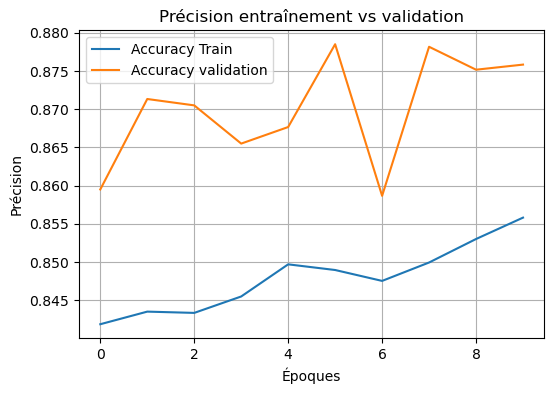

Test accuracy: 0.870


In [145]:
train_acc = history.history.get('accuracy')
val_acc   = history.history.get('val_accuracy')

plt.figure(figsize=(6,4))
plt.plot(train_acc, label='Accuracy Train')
plt.plot(val_acc,   label='Accuracy validation')
plt.xlabel('Époques'); plt.ylabel('Précision')
plt.title('Précision entraînement vs validation')
plt.legend(); plt.grid(True); plt.show()

# --- Évaluation test ---
# >>> Correction ici : utiliser model8
test_loss, test_acc = model8.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

La valeur d'accuracy fluctue, et on pourrait avoir un meilleure modèle avec une accuracy suppérieure à 90%
On va essyer 2 chose : 

1 / BatchNormalization après chaque conv → stabilise et réduit les oscillations

2/ GlobalAveragePooling2D à la place de Flatten()+Dense(49) → moins de paramètres, moins d’overfit.

In [148]:
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


model9 = Sequential()
model9.add(Input(shape=(28,28,1)))
model9.add(data_augmentation)  # tu l'avais déjà

model9.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model9.add(BatchNormalization())  ###### normalise les oscillations
model9.add(MaxPooling2D(pool_size=2))

# Bloc 2 
model9.add(Conv2D(filters=96, kernel_size=3, padding='same', activation='relu'))
model9.add(BatchNormalization()) ###### normalise les oscillations
model9.add(MaxPooling2D(pool_size=2))

model9.add(GlobalAveragePooling2D())     # <= remplace Flatten()+Dense(49)
model9.add(Dropout(0.4))
model9.add(Dense(10, activation='softmax'))

# légère modification du learning_rate
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)  # plus bas que le défaut
model9.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model9.summary()

# Callbacks (inchangés, mais patience un peu plus courte pour LR)
cbs = [
    EarlyStopping(patience=7, restore_best_weights=True, monitor="val_accuracy"),
    ReduceLROnPlateau(patience=2, factor=0.5, monitor="val_loss"),
    ModelCheckpoint("best_fashion.keras", save_best_only=True, monitor="val_accuracy")
]

# Entraînement (batch plus grand = gradients plus stables)
# --- Entraînement ---
history2 = model9.fit(x_train, y_train, epochs=10, validation_split=0.1)



Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_25 (Sequential)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 14, 14, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 7, 7, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 96)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,642 (225.16 KB)

 Trainable params: 57,322 (223.91 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.6706 - loss: 0.9251 - val_accuracy: 0.7102 - val_loss: 0.8574
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.7595 - loss: 0.6827 - val_accuracy: 0.7797 - val_loss: 0.6147
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - accuracy: 0.7796 - loss: 0.6220 - val_accuracy: 0.7155 - val_loss: 0.7447
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.7928 - loss: 0.5835 - val_accuracy: 0.7528 - val_loss: 0.6632
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.7990 - loss: 0.5675 - val_accuracy: 0.7880 - val_loss: 0.5687
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.8053 - loss: 0.5514 - val_accuracy: 0.7988 - val_loss: 0.6254
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.8089 - loss: 0.5396 - val_accuracy: 0.8068 - val_loss: 0.5388
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.8132 -

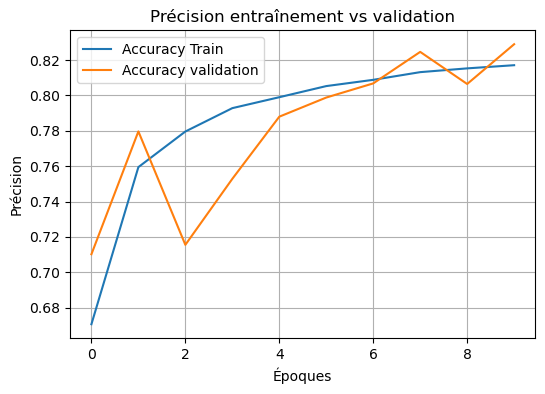

Test accuracy: 0.825


In [150]:
# Courbes
import matplotlib.pyplot as plt
train_acc2 = history2.history.get('accuracy')
val_acc2   = history2.history.get('val_accuracy')

plt.figure(figsize=(6,4))
plt.plot(train_acc2, label='Accuracy Train')
plt.plot(val_acc2,   label='Accuracy validation')
plt.xlabel('Époques'); plt.ylabel('Précision')
plt.title('Précision entraînement vs validation')
plt.legend(); plt.grid(True); plt.show()

# Test
test_loss, test_acc = model9.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

Cel flutue moins mais on baisse l'accuracy. 
On va remodifier la structure de notre modèle an enlevant les images additionés

In [151]:

model10 = Sequential()
model10.add(Input(shape=(28,28,1)))

model10.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model10.add(BatchNormalization())  ###### normalise les oscillations
model10.add(MaxPooling2D(pool_size=2))

# Bloc 2 
model10.add(Conv2D(filters=106, kernel_size=3, padding='same', activation='relu'))
model10.add(BatchNormalization()) ###### normalise les oscillations
model10.add(MaxPooling2D(pool_size=2))

model10.add(GlobalAveragePooling2D())     # <= remplace Flatten()+Dense(410)
model10.add(Dense(10, activation='softmax'))

# légère modification du learning_rate
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)  # plus bas que le défaut
model10.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model10.summary()

# Callbacks (inchangés, mais patience un peu plus courte pour LR)
cbs = [
    EarlyStopping(patience=7, restore_best_weights=True, monitor="val_accuracy"),
    ReduceLROnPlateau(patience=2, factor=0.5, monitor="val_loss"),
    ModelCheckpoint("best_fashion.keras", save_best_only=True, monitor="val_accuracy")
]

# Entraînement (batch plus grand = gradients plus stables)
# --- Entraînement ---
history2 = model10.fit(x_train, y_train, epochs=10, validation_split=0.1)

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 28, 28, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 14, 14, 106)    │        61,162 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 106)    │           424 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 7, 7, 106)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 106)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         1,070 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,552 (248.25 KB)

 Trainable params: 63,212 (246.92 KB)

 Non-trainable params: 340 (1.33 KB)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.8264 - loss: 0.5169 - val_accuracy: 0.8612 - val_loss: 0.4075
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.8810 - loss: 0.3339 - val_accuracy: 0.8623 - val_loss: 0.4041
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8960 - loss: 0.2940 - val_accuracy: 0.8557 - val_loss: 0.4041
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9046 - loss: 0.2683 - val_accuracy: 0.8360 - val_loss: 0.4377
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9089 - loss: 0.2516 - val_accuracy: 0.8932 - val_loss: 0.3199
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.9143 - loss: 0.2371 - val_accuracy: 0.8820 - val_loss: 0.3362
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9194 - loss: 0.2251 - val_accuracy: 0.9053 - val_loss: 0.2603
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9246 -

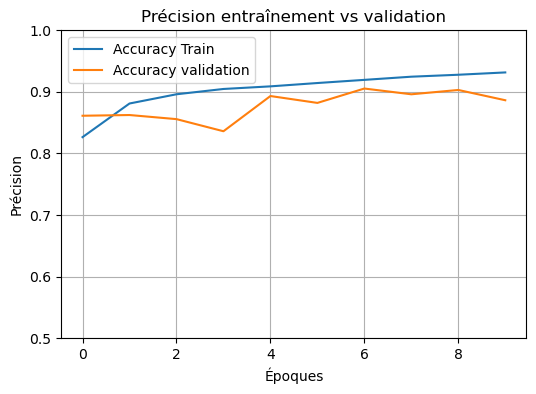

Test accuracy: 0.879


In [155]:
# Courbes
import matplotlib.pyplot as plt
train_acc3 = history2.history.get('accuracy')
val_acc3   = history2.history.get('val_accuracy')

plt.figure(figsize=(6,4))
plt.plot(train_acc3, label='Accuracy Train')
plt.plot(val_acc3,   label='Accuracy validation')
plt.xlabel('Époques'); plt.ylabel('Précision')
plt.title('Précision entraînement vs validation')
plt.ylim(0.5,1)
plt.legend(); plt.grid(True); plt.show()

# Test
test_loss, test_acc = model10.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.3f}")

sans l'additon d'image il y a une nette amélioration de l'accuracy.
Faut de temps, je ne peux pas jouer sur tous la modification de las structure, ou l'obersavtion de nouveau modèle, mais j'ai bien compris le principe.